In [1]:
# Compare Image-Processing Modules
# Use Transforms Module of torchvision
# 				&&&
# 对比python中不同的图像处理模块
# 并且使用torchvision中的transforms模块进行图像处理

# packages
from PIL import Image
from skimage import io, transform
import cv2

import torchvision.transforms as transforms
import matplotlib.pyplot as plt
%matplotlib inline

img_PIL = Image.open('./images/dancing.jpg')
img_skimage = io.imread('./images/dancing.jpg')
img_opencv = cv2.imread('./images/dancing.jpg')
img_plt = plt.imread('./images/dancing.jpg')

loader = transforms.Compose([
    transforms.ToTensor()])  # 转换为torch.tensor格式


print('The shape of \n img_skimage is {}\n img_opencv is {}\n img_plt is {}\n'.format(img_skimage.shape, img_opencv.shape, img_plt.shape))
print('The type of \n img_skimage is {}\n img_opencv is {}\n img_plt is {}\n'.format(type(img_skimage), type(img_opencv), type(img_plt)))

The shape of 
 img_skimage is (444, 444, 3)
 img_opencv is (444, 444, 3)
 img_plt is (444, 444, 3)

The type of 
 img_skimage is <class 'numpy.ndarray'>
 img_opencv is <class 'numpy.ndarray'>
 img_plt is <class 'numpy.ndarray'>



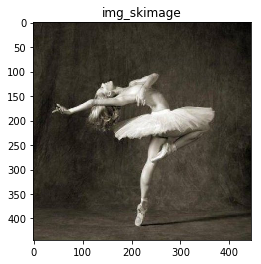

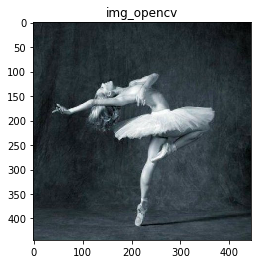

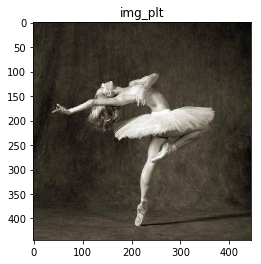

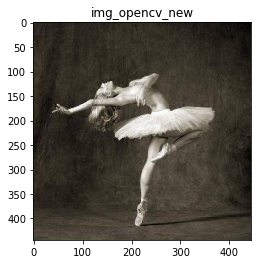

In [2]:
# 定义一个图像显示函数
def my_imshow(image, title=None):
	plt.imshow(image)
	if title is not None:
		plt.title(title)
	plt.pause(0.001)  # 这里延时一下，否则图像无法加载


plt.figure()
my_imshow(img_skimage, title='img_skimage')
# 可以看到opencv读取的图像打印出来的颜色明显与其他不同
plt.figure()
my_imshow(img_opencv, title='img_opencv')
plt.figure()
my_imshow(img_plt, title='img_plt')

# opencv读出的图像颜色通道为BGR，需要对此进行转换
img_opencv = cv2.cvtColor(img_opencv, cv2.COLOR_BGR2RGB)
plt.figure()
my_imshow(img_opencv, title='img_opencv_new')



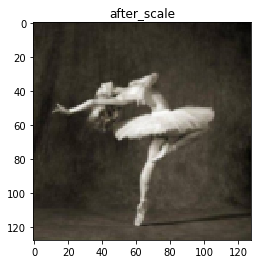

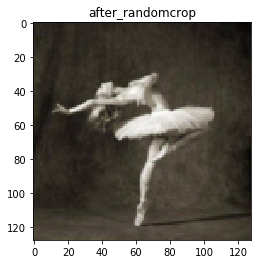

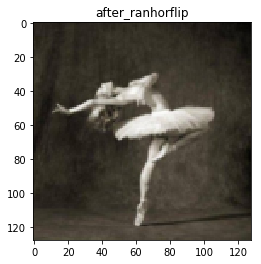

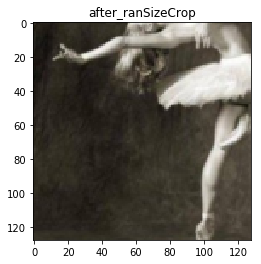

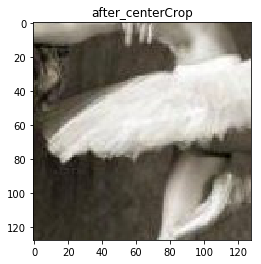

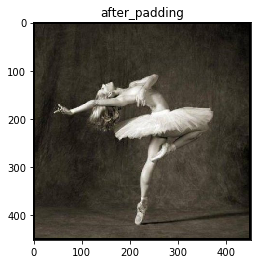

In [4]:
toTensor = transforms.Compose([transforms.ToTensor()])

# 尺寸变化、缩放
transform_scale = transforms.Compose([transforms.Scale(128)])
temp = transform_scale(img_PIL)
plt.figure()
my_imshow(temp, title='after_scale')

# 随机裁剪
transform_randomCrop = transforms.Compose([transforms.RandomCrop(32, padding=4)])
temp = transform_scale(img_PIL)
plt.figure()
my_imshow(temp, title='after_randomcrop')

# 随机进行水平翻转（0.5几率）
transform_ranHorFlip = transforms.Compose([transforms.RandomHorizontalFlip()])
temp = transform_scale(img_PIL)
plt.figure()
my_imshow(temp, title='after_ranhorflip')

# 随机裁剪到特定大小
transform_ranSizeCrop = transforms.Compose([transforms.RandomSizedCrop(128)])
temp = transform_ranSizeCrop(img_PIL)
plt.figure()
my_imshow(temp, title='after_ranSizeCrop')

# 中心裁剪
transform_centerCrop = transforms.Compose([transforms.CenterCrop(128)])
temp = transform_centerCrop(img_PIL)
plt.figure()
my_imshow(temp, title='after_centerCrop')

# 空白填充
transform_pad = transforms.Compose([transforms.Pad(4)])
temp = transform_pad(img_PIL)
plt.figure()
my_imshow(temp, title='after_padding')

# 标准化是在整个数据集中对所有图像进行取平均和均方差，演示图像数量过少无法进行此操作
# print(train_data.mean(axis=(0,1,2))/255)
# print(train_data.std(axis=(0,1,2))/255)
# transform_normal = transforms.Compose([transforms.Normalize()])

# Lamdba使用用户自定义函数来对图像进行剪裁
# transform_pad = transforms.Compose([transforms.Lambda()])